## Importing Libraries and loading dataset

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
    
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Load Dataset
train_df = pd.read_csv('train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test_df = pd.read_csv('test.csv')
test_df.shape

(3263, 4)

In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Check Missing Values

In [5]:
# count the number of missing values dataset.isna().sum()
missing_values = test_df.isna().sum()

print("Missing values in the our dataset.", missing_values)

Missing values in the our dataset. id             0
keyword       26
location    1105
text           0
dtype: int64


In [6]:
#using .isnull method dataset.isnull().sum()
missing_values = train_df.isnull().sum()
print(missing_values)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [7]:
#.notna() method dataset.notna().sum()

non_missing_values = train_df.notna().sum()
print(non_missing_values)

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64


In [8]:
#Check if there are null values
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
#Fill missing values to preprocess the data
train_df['keyword'].fillna('No_Keyword', inplace=True)
train_df['location'].fillna('No_location', inplace=True)
train_df.head()

,id,keyword,location,text,target
0,1,No_Keyword,No_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,No_Keyword,No_location,Forest fire near La Ronge Sask. Canada,1
2,5,No_Keyword,No_location,All residents asked to 'shelter in place' are ...,1
3,6,No_Keyword,No_location,"13,000 people receive #wildfires evacuation or...",1
4,7,No_Keyword,No_location,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
#Fill missing values to preprocess the data
test_df['keyword'].fillna('No_Keyword', inplace=True)
test_df['location'].fillna('No_location', inplace=True)
test_df.head()

,id,keyword,location,text
0,0,No_Keyword,No_location,Just happened a terrible car crash
1,2,No_Keyword,No_location,"Heard about #earthquake is different cities, s..."
2,3,No_Keyword,No_location,"there is a forest fire at spot pond, geese are..."
3,9,No_Keyword,No_location,Apocalypse lighting. #Spokane #wildfires
4,11,No_Keyword,No_location,Typhoon Soudelor kills 28 in China and Taiwan


## Preprocessing Data

In [11]:
#Working with nltk library
import nltk
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrutiboparti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shrutiboparti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#Data Cleaning
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove emojis
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join the tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

In [13]:
#apply preprocess function
train_df['text'] = train_df.loc[:,'text'].apply(preprocess_text)
train_df.head()

,id,keyword,location,text,target
0,1,No_Keyword,No_location,Deeds Reason earthquake May ALLAH Forgive us,1
1,4,No_Keyword,No_location,Forest fire near La Ronge Sask Canada,1
2,5,No_Keyword,No_location,residents asked shelter place notified officer...,1
3,6,No_Keyword,No_location,13000 people receive wildfires evacuation orde...,1
4,7,No_Keyword,No_location,got sent photo Ruby Alaska smoke wildfires pou...,1


In [14]:
#apply preprocess function
test_df['text'] = test_df.loc[:,'text'].apply(preprocess_text)
test_df.head()

,id,keyword,location,text
0,0,No_Keyword,No_location,happened terrible car crash
1,2,No_Keyword,No_location,Heard earthquake different cities stay safe ev...
2,3,No_Keyword,No_location,forest fire spot pond geese fleeing across str...
3,9,No_Keyword,No_location,Apocalypse lighting Spokane wildfires
4,11,No_Keyword,No_location,Typhoon Soudelor kills 28 China Taiwan


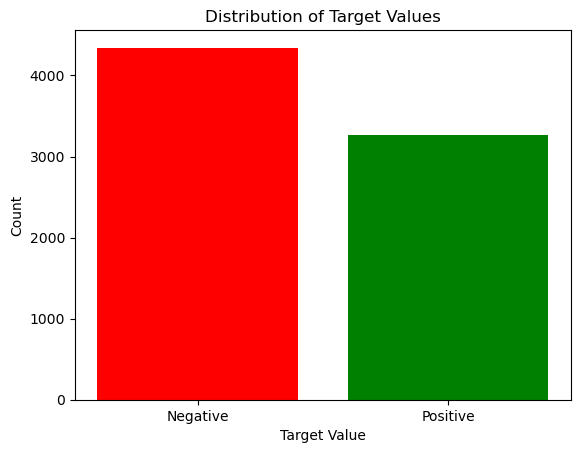

In [15]:
# Count the occurrences of each target value
target_counts = train_df['target'].value_counts()

#Plot the bar chart
plt.bar(target_counts.index, target_counts.values, color=['red', 'green'])
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Values')
plt.xticks(target_counts.index, ['Negative', 'Positive'])
plt.show()

In [16]:
train_df['location'] = train_df.loc[:,'location'].apply(preprocess_text)
train_df['keyword'] = train_df.loc[:,'keyword'].apply(preprocess_text)

In [17]:
# Count the occurrences of each location name
location_counts = train_df['location'].value_counts()
location_counts

location
No_location                 2533
USA                          109
New York                      73
                              62
United States                 50
                            ... 
Surulere LagosHome Swagg       1
MontrÌal QuÌbec                1
Montreal                       1
ÌÏT 64682318287                1
Lincoln                        1
Name: count, Length: 3132, dtype: int64

In [18]:
# Count the occurrences of each keyword name
location_counts = train_df['keyword'].value_counts()
location_counts

keyword
No_Keyword              61
fatalities              45
deluge                  42
armageddon              42
sinking                 41
                        ..
forest20fire            19
epicentre               12
threat                  11
inundation              10
radiation20emergency     9
Name: count, Length: 222, dtype: int64

In [19]:
# Separate the data into positive and negative labels
positive_df = train_df[train_df['target'] == 1]
negative_df = train_df[train_df['target'] == 0]

positive_df.head()

,id,keyword,location,text,target
0,1,No_Keyword,No_location,Deeds Reason earthquake May ALLAH Forgive us,1
1,4,No_Keyword,No_location,Forest fire near La Ronge Sask Canada,1
2,5,No_Keyword,No_location,residents asked shelter place notified officer...,1
3,6,No_Keyword,No_location,13000 people receive wildfires evacuation orde...,1
4,7,No_Keyword,No_location,got sent photo Ruby Alaska smoke wildfires pou...,1


## Detect Outliers

In [20]:
#Detecting outliers if there are any
#Let creat a subview of our dataset with the numeric columns: target
dataset_o = train_df[['target']]

In [21]:
# calculate z_score

# Store the mean and standard deviation of each column
column_mean = dataset_o.mean()
column_std = dataset_o.std()

# Subtract the mean of each column from its values
dataset_mean_centered = dataset_o - column_mean

# Divide the mean-centered data by the standard deviation of each column
z_score = np.abs(dataset_mean_centered/column_std)

print(z_score)

        target
0     1.152063
1     1.152063
2     1.152063
3     1.152063
4     1.152063
...        ...
7608  1.152063
7609  1.152063
7610  1.152063
7611  1.152063
7612  1.152063

[7613 rows x 1 columns]


#Alternatively

z_score = np.abs(dataset2 - dataset2.mean()) / dataset2.std()

print(z_score)

In [22]:
# Identify the outliers by selecting data points with Z-Score greater than 3
outliers = (z_score> 3).any(axis=1)

print(outliers)

print("There are ", outliers.sum(), " outlier in our dataset")

0       False
1       False
2       False
3       False
4       False
        ...  
7608    False
7609    False
7610    False
7611    False
7612    False
Length: 7613, dtype: bool
There are  0  outlier in our dataset


Since we have 0 outliers, we dont need to treat the data for Outliers

## Visualize data

In [23]:
#Plot 10 ten location and keyword
top_positive_locations = positive_df[(positive_df['location'] != 'No_location')]['location'].value_counts().head(10)
top_negative_locations = negative_df[(negative_df['location'] != 'No_location')]['location'].value_counts().head(10)

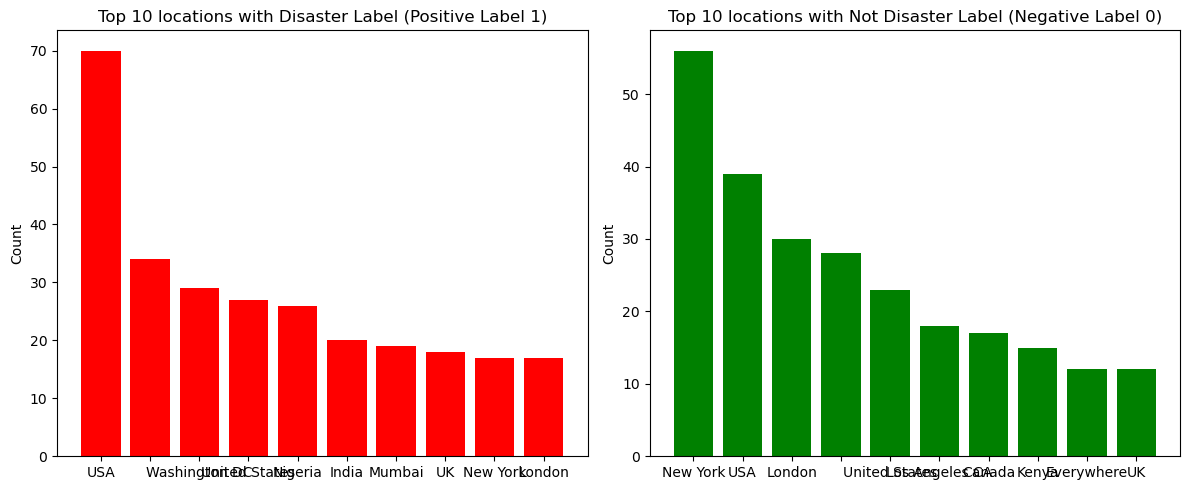

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Top 10 positive location
axes[0].bar(top_positive_locations.index, top_positive_locations.values, color='red')
axes[0].set_title('Top 10 locations with Disaster Label (Positive Label 1)')
axes[0].set_ylabel('Count')

# Top 10 negative location
axes[1].bar(top_negative_locations.index, top_negative_locations.values, color='green')
axes[1].set_title('Top 10 locations with Not Disaster Label (Negative Label 0)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [25]:
#Cloud word with keyword
from wordcloud import WordCloud

disaster_keywords = ' '.join(positive_df[(positive_df['keyword'] != 'No_Keyword')]['keyword'].astype(str))
no_disaster_keywords = ' '.join(negative_df[(negative_df['keyword'] != 'No_Keyword')]['keyword'].astype(str))


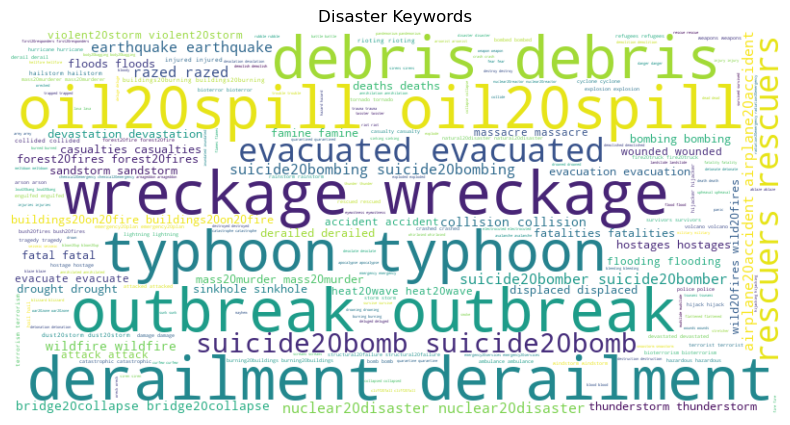

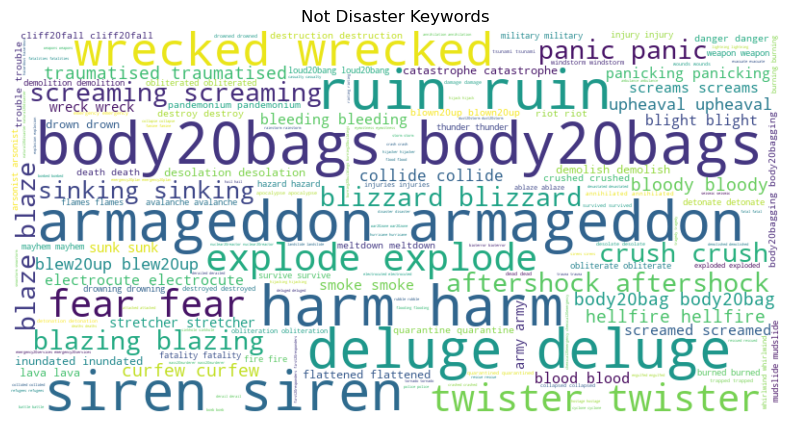

In [26]:
# Generate the word cloud
def generate_word_cloud(data,title):

    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(data)

    # Display the generated word cloud using Matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_word_cloud(disaster_keywords,"Disaster Keywords")
generate_word_cloud(no_disaster_keywords,"Not Disaster Keywords")

In [27]:
#Use bag of word to show common words in post text
from sklearn.feature_extraction.text import CountVectorizer

positive_data = positive_df['text']
negative_data = negative_df['text']

In [28]:
# Function to get top words
def get_top_words(text_data, top_n=10):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(text_data)
    words = vectorizer.get_feature_names_out()
    word_counts = X.sum(axis=0).A1
    word_freq = dict(zip(words, word_counts))
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return dict(sorted_word_freq[:top_n])

In [29]:
# Get top words for each label
top_positive_words = get_top_words(positive_data)
top_negative_words = get_top_words(negative_data)

top_negative_words

{'like': 253,
 'im': 243,
 'amp': 192,
 'new': 168,
 'get': 163,
 'dont': 141,
 'one': 127,
 'body': 112,
 'via': 99,
 'would': 97}

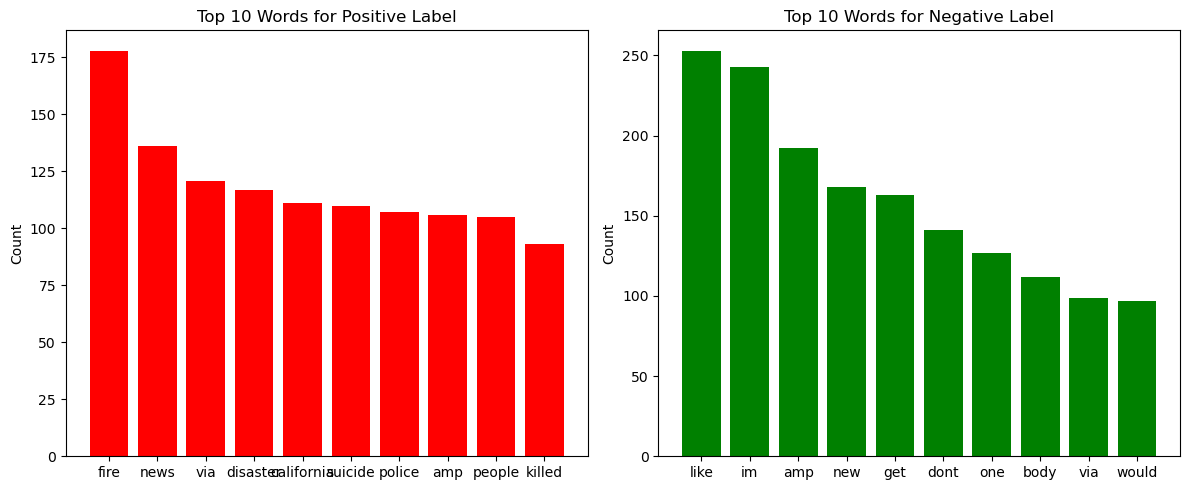

In [30]:
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Positive label
axes[0].bar(top_positive_words.keys(), top_positive_words.values(), color='red')
axes[0].set_title('Top 10 Words for Positive Label')
axes[0].set_ylabel('Count')

# Negative label
axes[1].bar(top_negative_words.keys(), top_negative_words.values(), color='green')
axes[1].set_title('Top 10 Words for Negative Label')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

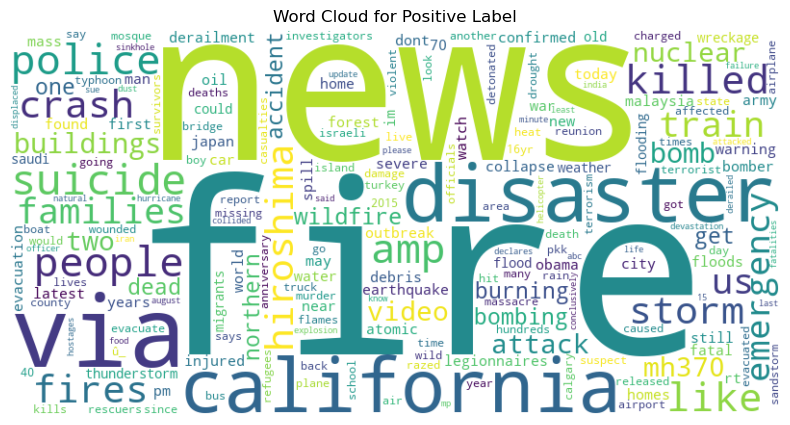

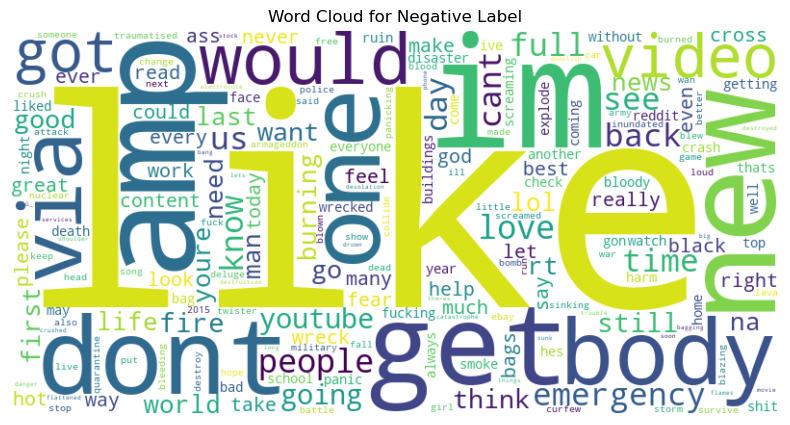

In [31]:
# Function to get word cloud
def generate_word_cloud(text_data, title):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(text_data)
    words = vectorizer.get_feature_names_out()
    word_counts = X.sum(axis=0).A1
    word_freq = dict(zip(words, word_counts))

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for each label
generate_word_cloud(train_df[train_df['target'] == 1]['text'], 'Word Cloud for Positive Label')
generate_word_cloud(train_df[train_df['target'] == 0]['text'], 'Word Cloud for Negative Label')


## Train and split data

In [32]:
#Baseline Models
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['target'], test_size=0.2, random_state=42)

# Train with different Models

## 1. Logistic Regression Model

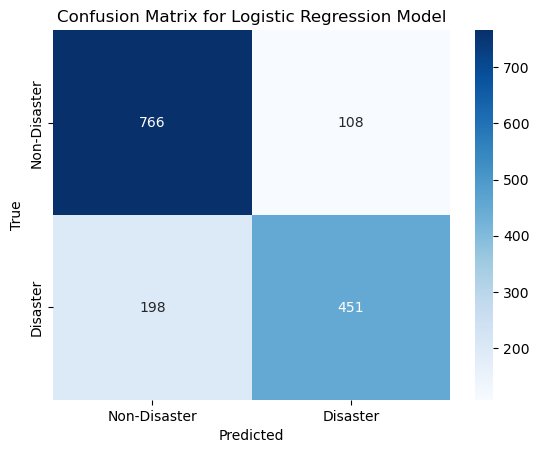


Accuracy for Logistic Regression Model: 0.799080761654629
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [34]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Build a logistic regression model
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)

# Make predictions
lr_predictions = lr_classifier.predict(X_test_tfidf)

conf_matrix = confusion_matrix(y_test, lr_predictions)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Evaluate the model
accuracy_lr = accuracy_score(y_test, lr_predictions)
report_lr = classification_report(y_test, lr_predictions)

print(f"\nAccuracy for Logistic Regression Model: {accuracy_lr}")
print("Classification Report:")
print(report_lr)

## 2. Naive Bayes Model

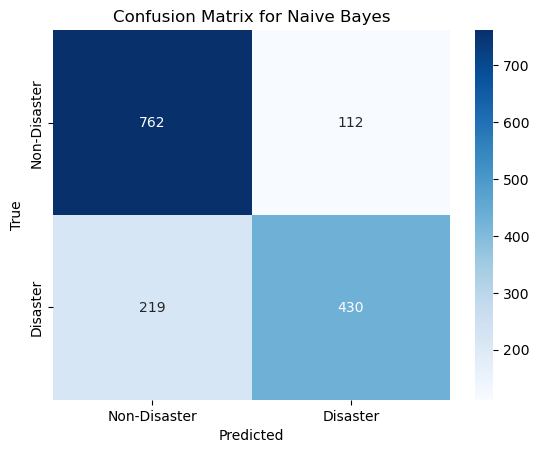


Accuracy for Naive Bayes: 0.7826657912015759
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       874
           1       0.79      0.66      0.72       649

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



In [35]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train a Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
nb_predict = naive_bayes_model.predict(X_test_tfidf)

#Naive Bayes
conf_matrix = confusion_matrix(y_test, nb_predict)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Evaluate the model
accuracy_nb = accuracy_score(y_test, nb_predict)
report_nb = classification_report(y_test, nb_predict)

print(f"\nAccuracy for Naive Bayes: {accuracy_nb}")
print("Classification Report:")
print(report_nb)

# Support Vector Machine Model

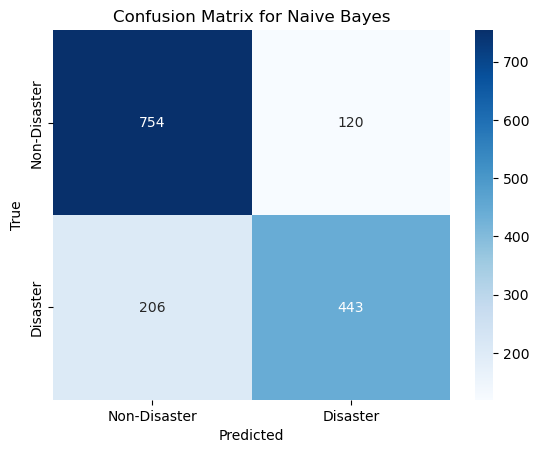


Accuracy for Naive Bayes: 0.7859487852921865
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       874
           1       0.79      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



In [36]:
from sklearn.svm import SVC

# Initialize and train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')  # You can try different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
svm_pridict = svm_model.predict(X_test_tfidf)

#SVC
conf_matrix = confusion_matrix(y_test, svm_pridict)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Evaluate the model
accuracy_svm = accuracy_score(y_test, svm_pridict)
report_svm = classification_report(y_test, svm_pridict)

print(f"\nAccuracy for Naive Bayes: {accuracy_svm}")
print("Classification Report:")
print(report_svm)

## RNN Model with LSTM

In [37]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report

# Tokenize and pad the sequences
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100  # Set the maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Make predictions on the test set
y_pred_proba = model.predict(X_test_pad)
y_pred = (y_pred_proba > 0.5).astype(int)

Epoch 1/5
191/191 [==============================] - 10s 51ms/step - loss: 0.5247 - accuracy: 0.7365 - val_loss: 0.4433 - val_accuracy: 0.7978
Epoch 2/5
191/191 [==============================] - 10s 50ms/step - loss: 0.3344 - accuracy: 0.8614 - val_loss: 0.4716 - val_accuracy: 0.7853
Epoch 3/5
191/191 [==============================] - 10s 50ms/step - loss: 0.2481 - accuracy: 0.9043 - val_loss: 0.5666 - val_accuracy: 0.7590
Epoch 4/5
191/191 [==============================] - 10s 51ms/step - loss: 0.1919 - accuracy: 0.9278 - val_loss: 0.6977 - val_accuracy: 0.7610
Epoch 5/5
48/48 [==============================] - 1s 13ms/step


In [38]:
# Evaluate the model
accuracy_lstm = accuracy_score(y_test, y_pred)
print(f'Accuracy for LSTM: {accuracy_lstm:.2f}')

# Display additional evaluation metrics
print('\nClassification Report for LSTM:')
print(classification_report(y_test, y_pred))

Accuracy for LSTM: 0.75

Classification Report for LSTM:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       874
           1       0.71      0.69      0.70       649

    accuracy                           0.75      1523
   macro avg       0.74      0.74      0.74      1523
weighted avg       0.75      0.75      0.75      1523



In [39]:
#Test with Test Data

test_data = test_df['text']

# Vectorize the new data using the same TF-IDF vectorizer
X_new = vectorizer.transform(test_data)

# Make predictions using the t0rained model Logistic Regression
new_predictions = lr_classifier.predict(X_new)

# Create a new DataFrame with the results
results_data = {'Text': test_data, 'Prediction': ['Disaster' if prediction == 1 else 'Non-Disaster' for prediction in new_predictions]}
results_df = pd.DataFrame(results_data)
results_df

,Text,Prediction
0,happened terrible car crash,Disaster
1,Heard earthquake different cities stay safe ev...,Disaster
2,forest fire spot pond geese fleeing across str...,Disaster
3,Apocalypse lighting Spokane wildfires,Non-Disaster
4,Typhoon Soudelor kills 28 China Taiwan,Disaster
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTEN...,Disaster
3259,Storm RI worse last hurricane cityamp3others h...,Disaster
3260,Green Line derailment Chicago,Disaster
3261,MEG issues Hazardous Weather Outlook HWO,Disaster


In [40]:
ids = range(0, len(new_predictions))
submission_df = pd.DataFrame({'id': ids, 'target': new_predictions})
submission_df

,id,target
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
3258,3258,1
3259,3259,1
3260,3260,1
3261,3261,1


# Results and Discussion

In [41]:
data = {'modules': ['LR','SVC','NB','LSTM'],
        'Score': [accuracy_lr,accuracy_svm,accuracy_nb,accuracy_lstm,]}
df =pd.DataFrame(data)
df['Score'] =df['Score']*100
df.sort_values(by='Score',ascending=False)

,modules,Score
0,LR,79.908076
1,SVC,78.594879
2,NB,78.266579
3,LSTM,74.786605


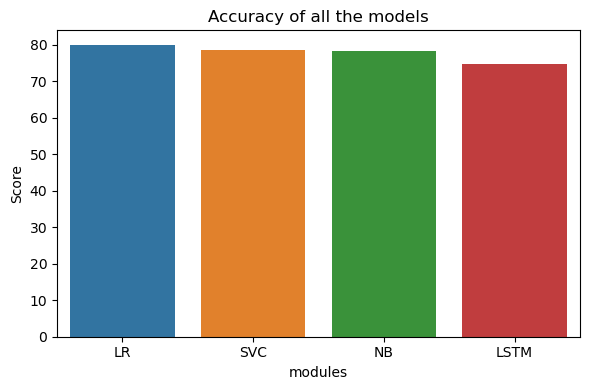

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(data=df.head(100),x='modules',y='Score')
plt.title('Accuracy of all the models')
plt.tight_layout()
plt.show()

I developed a Machine learning model that learns to tell if a tweet is talking about a real disaster or not. So, it helps figure out which tweets are actually about serious events and which ones are not.

Upon comparing all the models, a striking similarity in results emerges. Logistic regression, Support Vector Machine, Naive Bayes, and RNN with LSTM models exhibit accuracy levels ranging from 70% to 80%. Notably, Logistic regression outperforms the others, securing the top position with an accuracy of 79.90%. On the other end of the spectrum, RNN with LSTM records the lowest accuracy among the models, standing at 73%. This analysis indicates a consistent performance range across the various models, with Logistic regression demonstrating the highest predictive accuracy.

So clearly Logistic regression works well when predicting whether a tweet is referred to serious disaster events, or whether it is a metaphor tweet.

Though the current analysis is confined to predefined hyperparameters, there exists the potential for improved accuracy by fine-tuning the hyperparameters of each model. Adjusting these parameters allows for a more nuanced exploration of the models' capabilities, opening up possibilities for enhanced performance and more accurate predictions.

I put in my utmost effort to handle data preprocessing, emphasizing feature extraction, and fine-tuning the hyperparameters.